# KEN1435 - Principles of Data Science | Lab 1: Exploring python

First we load the necessary python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

Let's start by loading the data. We can load tabular data with `pandas` using the `read_csv` function, you can find the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). It will load the data into a `pandas.DataFrame` (see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)).

Let's revisit the data that you have just used the previous semester during Project 1-1.

In [2]:
grades = pd.read_csv("C:/Users/timis/DataspellProjects/PrinciplesOfDataScience/Lab1/Data/CurrentGrades2.csv", index_col="StudentID", sep=";", na_values="NG")

If we want to take a quick look at this DataFrame, we can use the function `head` (see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)) to take a quick look at the first five rows.

In [3]:
grades.head()

,MTE-004,LOE-103,DSE-005,JTE-234,JHF-101,LDE-009,BKO-800,ATE-214,FEA-907,TGL-013,...,GHL-823,WDM-974,TSO-010,PPL-239,DSE-003,LPG-307,PLO-132,ATE-014,KMO-007,ATE-008
StudentID,,,,,,,,,,,,,,,,,,,,,
1000457,7.0,8.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1000543,7.0,7.0,NaN,NaN,NaN,NaN,7.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1000286,7.0,7.0,NaN,NaN,NaN,NaN,8.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
1001653,6.0,6.0,NaN,NaN,NaN,NaN,7.0,6.0,5.0,5.0,...,NaN,NaN,NaN,6.0,4.0,5.0,NaN,NaN,NaN,7.0
1001165,9.0,8.0,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN


We can see how many rows and columns the dataframe has by using `shape`

In [4]:
grades.shape

(1128, 30)

To select an individual item in the dataframe, you need to use `loc` (see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.htm)). For example, if we want the grade for MON-014 for student 1001752, we can use

In [5]:
grades.loc[1001752, "MON-014"]

9.0

If we want to select a complete row or column of a `DataFrame`, we will be returned a `Series` object (see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)). For instance, if we want all grades of student 1001752, we can use

In [6]:
grades.loc[1001752, :]

MTE-004    7.0
LOE-103    8.0
DSE-005    NaN
JTE-234    NaN
JHF-101    NaN
LDE-009    NaN
BKO-800    9.0
ATE-214    8.0
FEA-907    7.0
TGL-013    5.0
SLE-332    7.0
ATE-003    7.0
DSE-007    9.0
JTW-004    7.0
LUU-003    8.0
HLU-200    NaN
MON-014    9.0
JJP-001    NaN
WOT-104    7.0
BKO-801    NaN
GHL-823    NaN
WDM-974    NaN
TSO-010    NaN
PPL-239    7.0
DSE-003    7.0
LPG-307    6.0
PLO-132    NaN
ATE-014    NaN
KMO-007    NaN
ATE-008    7.0
Name: 1001752, dtype: float64

If we want to get all grades for a particular course (e.g., MTE-004), we have two options to select this. We can either use `loc`

In [7]:
grades.loc[:, "MON-014"]

StudentID
1000457     NaN
1000543     NaN
1000286     NaN
1001653     7.0
1001165     NaN
           ... 
1000765     NaN
1000052     NaN
1000701     NaN
1002102     9.0
1001388    10.0
Name: MON-014, Length: 1128, dtype: float64

or we can use the shorthand below

In [8]:
grades["MON-014"]

StudentID
1000457     NaN
1000543     NaN
1000286     NaN
1001653     7.0
1001165     NaN
           ... 
1000765     NaN
1000052     NaN
1000701     NaN
1002102     9.0
1001388    10.0
Name: MON-014, Length: 1128, dtype: float64

As you can see there are a lot of NaN-values in this data. Before we start doing data analysis, we first have to check whether these NaN-values will influence any calculations down the line. We do a quick check for this by calculating the mean both on all data at once and first removing the NaN-values.

In [9]:
grades["MON-014"].mean(), grades["MON-014"].dropna().mean()

(7.7885906040268456, 7.7885906040268456)

Note that these two numbers are the same, so under the hood pandas already removes the NaN-values when calculating descriptive statistics.

# Grade Analysis
Let's further explore this data in python. Let's start with the `describe` function (see documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)).

In [10]:
grades.describe()

,MTE-004,LOE-103,DSE-005,JTE-234,JHF-101,LDE-009,BKO-800,ATE-214,FEA-907,TGL-013,...,GHL-823,WDM-974,TSO-010,PPL-239,DSE-003,LPG-307,PLO-132,ATE-014,KMO-007,ATE-008
count,1127.000000,1126.000000,248.000000,212.000000,242.000000,210.000000,1124.000000,1124.000000,597.000000,595.000000,...,213.000000,211.000000,0.0,598.000000,1124.000000,598.000000,0.0,212.000000,213.000000,598.000000
mean,7.449867,7.433393,7.262097,7.688679,7.475207,7.452381,7.845196,7.653025,7.324958,7.366387,...,6.596244,7.189573,NaN,6.919732,6.959075,6.665552,NaN,7.896226,7.314554,7.105351
std,1.043851,1.068542,0.895250,0.962453,1.142087,1.115407,1.040183,1.036588,1.081385,1.091849,...,0.804694,1.163773,NaN,1.035506,1.173360,1.089858,NaN,1.052456,1.243710,1.086203
min,4.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,5.000000,NaN,4.000000,3.000000,4.000000,NaN,5.000000,4.000000,4.000000
25%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,6.000000,6.000000,NaN,6.000000,6.000000,6.000000,NaN,7.000000,6.000000,6.000000
50%,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,8.000000,7.000000,7.000000,...,7.000000,7.000000,NaN,7.000000,7.000000,7.000000,NaN,8.000000,7.000000,7.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,...,7.000000,8.000000,NaN,8.000000,8.000000,7.000000,NaN,9.000000,8.000000,8.000000
max,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,9.000000,10.000000,NaN,9.000000,10.000000,9.000000,NaN,10.000000,10.000000,10.000000


We can perform multiple calculations on the data by chaining commands. For instance, if we want to find which course has the lowest maximum grade of a course (using `idxmax`, see documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.idxmax.html)) and what that grade is (using `max`, see documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.max.html)), we can do that as follows

In [11]:
grades.max(axis=0).idxmin(), grades.max(axis=0).min()

('DSE-005', 9.0)

By passing the option `axis=0`, we specify that we are executing the function per column of the dataframe. If we want to calculate the mean per row, we pass the option `axis=1`. 

In pandas, we can easily select data according to specific conditions by building masks. For instance, if we want to select all students that have an average score higher than 8, we first construct the mask:

In [12]:
ma = grades.mean(axis=1) > 8
ma

StudentID
1000457    False
1000543    False
1000286    False
1001653    False
1001165    False
           ...  
1000765     True
1000052    False
1000701    False
1002102    False
1001388    False
Length: 1128, dtype: bool

Note that this mask is a `Series` of boolean values, which indicate whether a value adheres to the inequality or not. 

Before continuing, let's see how many students have an average score that is higher than 8. As the mask consists of booleans, we can just sum over all entries to get this quantity.

In [13]:
ma.sum()

222

Using this mask, we can make a subselection of the `DataFrame` and save it to the variable `selection` as follows

In [14]:
selection = grades[ma].copy()
selection

,MTE-004,LOE-103,DSE-005,JTE-234,JHF-101,LDE-009,BKO-800,ATE-214,FEA-907,TGL-013,...,GHL-823,WDM-974,TSO-010,PPL-239,DSE-003,LPG-307,PLO-132,ATE-014,KMO-007,ATE-008
StudentID,,,,,,,,,,,,,,,,,,,,,
1001093,9.0,9.0,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
1001312,9.0,8.0,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
1002745,9.0,10.0,9.0,8.0,8.0,8.0,7.0,8.0,9.0,8.0,...,7.0,7.0,NaN,8.0,8.0,7.0,NaN,8.0,7.0,9.0
1001793,8.0,9.0,NaN,NaN,NaN,NaN,9.0,7.0,8.0,8.0,...,NaN,NaN,NaN,8.0,8.0,8.0,NaN,NaN,NaN,8.0
1001397,7.0,8.0,NaN,NaN,NaN,NaN,9.0,9.0,9.0,8.0,...,NaN,NaN,NaN,8.0,7.0,7.0,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002695,8.0,9.0,8.0,9.0,10.0,9.0,9.0,8.0,9.0,9.0,...,8.0,8.0,NaN,8.0,8.0,8.0,NaN,8.0,7.0,7.0
1000123,9.0,10.0,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
1000179,9.0,8.0,NaN,NaN,NaN,NaN,9.0,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN


Note that we explicitly use the `copy` function (see documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html)) to make a copy of the underlying dataframe. If we don't do this and start adjusting values, we will get a `SettingWithCopyWarning` as you can see below

In [15]:
slctn = grades[ma]
slctn.loc[1001752, "MON-014"] = 6.0
slctn.loc[1001752, "MON-014"], grades.loc[1001752, "MON-014"]

C:\Users\timis\AppData\Local\Temp\ipykernel_15084\1367601991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slctn.loc[1001752, "MON-014"] = 6.0


(6.0, 9.0)

Read the documentation in the warning message to further dive into why this matters!

## Exercises
1. Determine how many students have an average score of 7.5 or higher.

In [16]:
# SOLUTION GOES HERE
avg_high = grades.mean(axis=1) >= 7.5
avg_high

StudentID
1000457    False
1000543    False
1000286    False
1001653    False
1001165     True
           ...  
1000765     True
1000052    False
1000701    False
1002102     True
1001388     True
Length: 1128, dtype: bool

2. What are the lowest and highest average score for a course?

In [17]:
# SOLUTION GOES HERE
avg = grades.mean(axis = 0)
low_avg = avg.idxmin()
high_avg = avg.idxmax()

# Adding additional information

In addition to the current grades of students, we also have a file with additional information about the students. 

In [18]:
info = pd.read_csv("C:/Users/timis/DataspellProjects/PrinciplesOfDataScience/Lab1/Data/StudentInfo (1).csv", sep=";")
info.head()

,StudentNumber,Suruna Value,Hurni Level,Lal Count,Volta
0,1000457,lobi,nothing,63,5 stars
1,1000543,nulp,nothing,80,1 star
2,1000286,lobi,medium,95,3 stars
3,1001653,lobi,low,80,1 star
4,1001165,nulp,medium,97,4 stars


In this information file, we see that StudentNumber is used instead of StudentID in the file with the grades, therefore we first have to rename this column and use it as index next

In [19]:
info.rename({"StudentNumber": "StudentID"}, inplace=True, axis=1)
info.set_index("StudentID", inplace=True)
info.head()

,Suruna Value,Hurni Level,Lal Count,Volta
StudentID,,,,
1000457,lobi,nothing,63,5 stars
1000543,nulp,nothing,80,1 star
1000286,lobi,medium,95,3 stars
1001653,lobi,low,80,1 star
1001165,nulp,medium,97,4 stars


Another useful tool that you can use to process data is the `apply` function. This allows you to process a function either per row or per column and runs a lot quicker than looping over a dataframe using a for-loop. For instance, we can build an additional column in the `info` DataFrame that contains the number of stars in the "Volta "-column.

In [20]:
info["num_stars_Volta"] = info.apply(lambda x: int(x["Volta "].split(" ")[0]), axis=1)
info.head()

,Suruna Value,Hurni Level,Lal Count,Volta,num_stars_Volta
StudentID,,,,,
1000457,lobi,nothing,63,5 stars,5
1000543,nulp,nothing,80,1 star,1
1000286,lobi,medium,95,3 stars,3
1001653,lobi,low,80,1 star,1
1001165,nulp,medium,97,4 stars,4


Several columns in this information have categorical values. If we want to quickly see which values it contains, we can use the `unique` function (see the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)) on a `pandas.Series` object.

In [21]:
info["Hurni Level"].unique()

array(['nothing', 'medium', 'low', 'full', 'high'], dtype=object)

## Exercises

3. construct a mapping from the textual Hurni levels to a numbered version that is easier to use in subsequent processing using the `apply` function.

In [22]:
# SOLUTION GOES HERE
info["Hurni_factorized"] = info["Hurni Level"].apply(lambda x: pd.factorize(x)[0])
info.head

<bound method NDFrame.head of           Suruna Value Hurni Level  Lal Count   Volta   num_stars_Volta  \
StudentID                                                                 
1000457           lobi     nothing         63  5 stars                5   
1000543           nulp     nothing         80   1 star                1   
1000286           lobi      medium         95  3 stars                3   
1001653           lobi         low         80   1 star                1   
1001165           nulp      medium         97  4 stars                4   
...                ...         ...        ...      ...              ...   
1000765           doot        full         59  4 stars                4   
1000052           lobi     nothing         94  5 stars                5   
1000701           lobi      medium         59   1 star                1   
1002102           doot      medium         91  4 stars                4   
1001388           doot      medium         71  5 stars                

4. How many students have both a 5 starts Volta rating and have an 8 or higher as average grade?

In [23]:
# SOLUTION GOES HERE

volta_five = info[info["num_stars_Volta"] == 5]
avg_grade = grades.mean(axis = 1)
avg_eight_higher = avg_grade[avg_grade >= 8]
students_both = volta_five.index.intersection(avg_eight_higher.index)
num_students_both = len(students_both)
num_students_both

42

# Data Visualization

In python, there are several packages that can help you visualize your data. In this course, we will use `matplotlib` and `seaborn`. The latter, `seaborn`, contains more complex plotting functions and is built on top of `matplotlib` (it effectively calls functions from `matplotlib` within its own functions).

## Exercises

5. Plot a bar graph (using `plt.bar`, see the documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)) of the distribution of how many students have how many Volta stars. HINT: first count the different occurences (e.g., using `np.histogram` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)))

<function matplotlib.pyplot.show(close=None, block=None)>

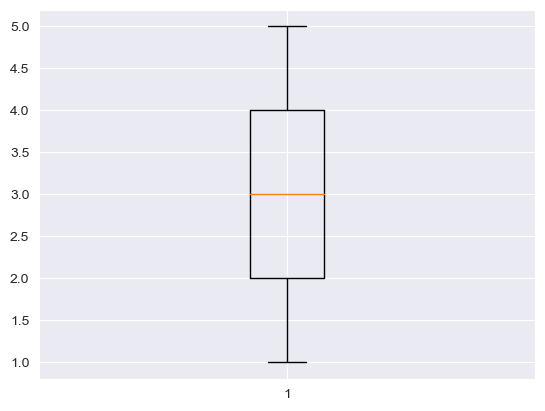

In [24]:
# SOLUTION GOES HERE
fig = plt.boxplot(info["num_stars_Volta"])
plt.show

6. Make a histogram of the grade distribution of the course named "MTE-004" using `Series.hist` (see documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html))

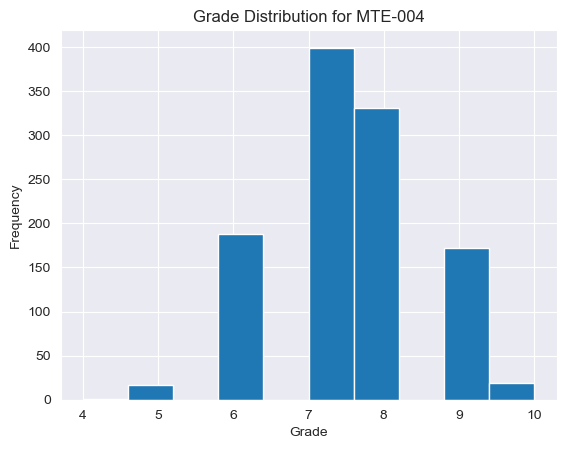

In [25]:
# SOLUTION GOES HERE
grades["MTE-004"].hist(bins = 10)
plt.title("Grade Distribution for MTE-004")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

7. Make a boxplot of the distribution of "Lal Count" using `seaborn.boxplot` (see documentation [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html))

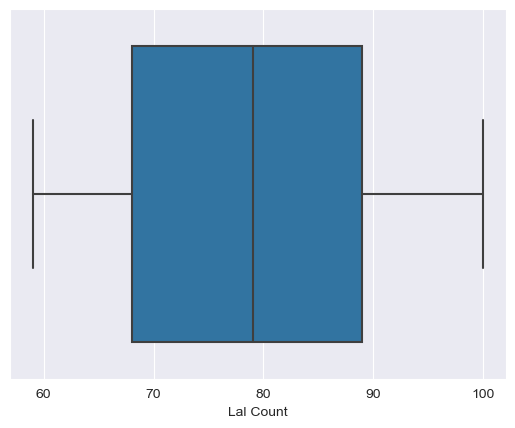

In [26]:
# SOLUTION GOES HERE
sns.boxplot(x = info["Lal Count"])
plt.show()

8. Make a scatter plot of the grade distribution of the course named "MTE-004" using `Series.plot` with the keyword `style="."` (see documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html))

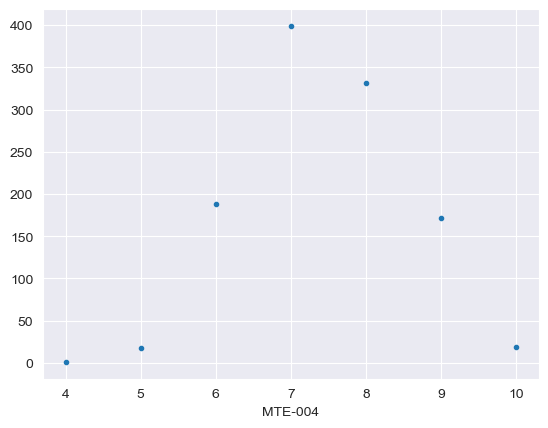

In [27]:
# SOLUTION GOES HERE
course_name = "MTE-004"
grade_dis = grades[course_name].value_counts().sort_index()
grade_dis.plot(style = ".")
plt.show()

9. Make a swarmplot for the distribution of the grades for the courses "MTE-004" and "LOE-103" using `seaborn.swarmplot` (see the documentation [here](https://seaborn.pydata.org/generated/seaborn.swarmplot.html))

In [30]:
# SOLUTION GOES HERE
course = ({"MTE-004" : grade_dis, "LOE-103" : grade_dis})
courses_melted = course.melt(var_name = "Course", value_name = "Grade")
sns.swarmplot(x = "Course", y = "Grade", data = courses_melted)
plt.show()

AttributeError: 'dict' object has no attribute 'melt'

10. Make a joint plot for the distribution of the grades for the courses "MTE-004" and "LOE-103" using `seaborn.swarmplot` (see the documentation [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html))

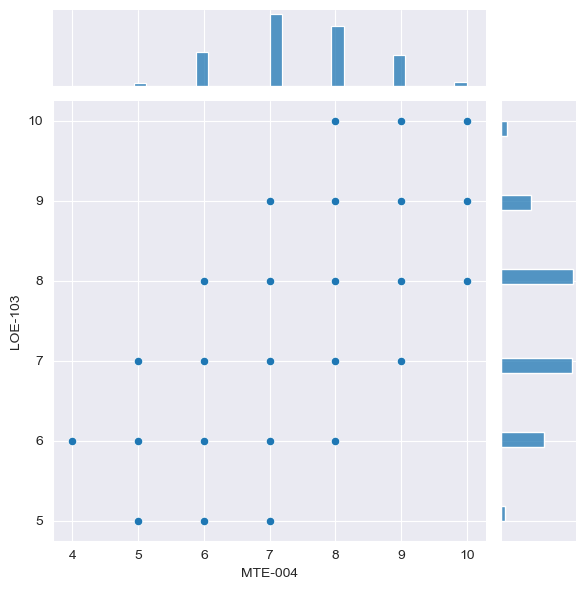

In [31]:
# SOLUTION GOES HERE
grades_general = grades[["MTE-004", "LOE-103"]].copy()
sns.jointplot(grades_general, x= "MTE-004", y = "LOE-103")

11. Implement one of the figures that you made in phase 2 of Project 1-1 in `matplotlib` or `seaborn`.

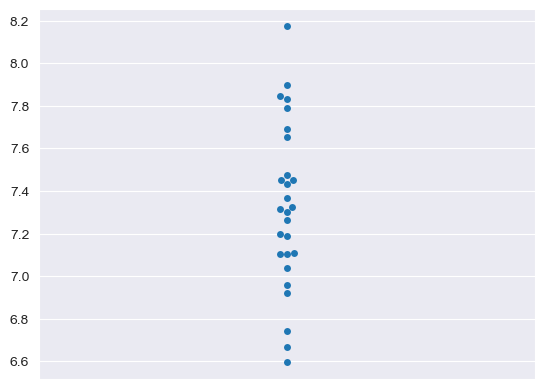

MTE-004    7.449867
LOE-103    7.433393
DSE-005    7.262097
JTE-234    7.688679
JHF-101    7.475207
LDE-009    7.452381
BKO-800    7.845196
ATE-214    7.653025
FEA-907    7.324958
TGL-013    7.366387
SLE-332    7.036975
ATE-003    6.741563
DSE-007    7.109431
JTW-004    7.104553
LUU-003    7.832451
HLU-200    7.301887
MON-014    7.788591
JJP-001    8.173387
WOT-104    7.198319
BKO-801         NaN
GHL-823    6.596244
WDM-974    7.189573
TSO-010         NaN
PPL-239    6.919732
DSE-003    6.959075
LPG-307    6.665552
PLO-132         NaN
ATE-014    7.896226
KMO-007    7.314554
ATE-008    7.105351
dtype: float64

In [29]:
# SOLUTION GOES HERE
sns.swarmplot(data = avg)
plt.show()
avg